<a href="https://colab.research.google.com/github/JaviARo/Actividad-3-4/blob/main/JavierAlemanRodriguez_Act_3_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Javier Alemán Rodríguez

Dataset: https://www.kaggle.com/datasets/uom190346a/sleep-health-and-lifestyle-dataset

### Importación de librerías

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.naive_bayes import GaussianNB, MultinomialNB, ComplementNB, BernoulliNB, CategoricalNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

### Importación del dataset

In [2]:
sleep_health = pd.read_csv('Sleep_health_and_lifestyle_dataset.csv')
sleep_health = sleep_health.dropna(axis=1)
sleep_health

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


### Separación entre valores de entrada y salida, conversión de variables categóricas en numéricas y separación de datos de entrenamiento y test

In [3]:
X = sleep_health.drop(columns=["Person ID", "Occupation", "Quality of Sleep"], axis=1)

X = X.assign(
    Blood_Pressure_Systolic = lambda x: x['Blood Pressure'].apply(lambda y: int(y[:y.find('/')])),
    Blood_Pressure_Diastolic = lambda x: x['Blood Pressure'].apply(lambda y: int(y[y.find('/') + 1:]))
)

X = X.drop(["Blood Pressure"], axis=1)

X['BMI Category'].replace(['Normal', 'Normal Weight', 'Overweight', 'Obese'],[0, 0, 1, 2], inplace=True)
X['Sleep Disorder'].replace(['None', 'Sleep Apnea', 'Insomnia'],[0, 1, 2], inplace=True)
X['Gender'].replace(['Female', 'Male'],[0, 1], inplace=True)
y = sleep_health["Quality of Sleep"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

### Matriz de correlación

<Axes: >

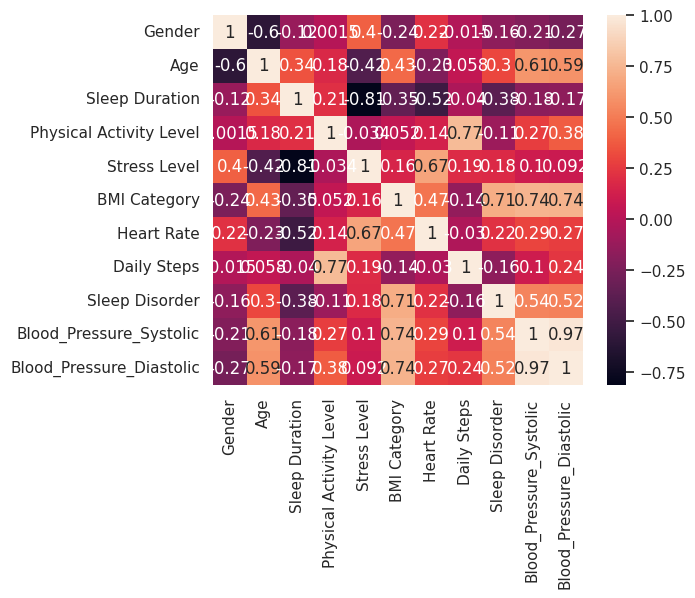

In [4]:
sns.set()
sns.heatmap(X.corr(), square=True, annot=True)

### Matriz de gráficos de dispersión

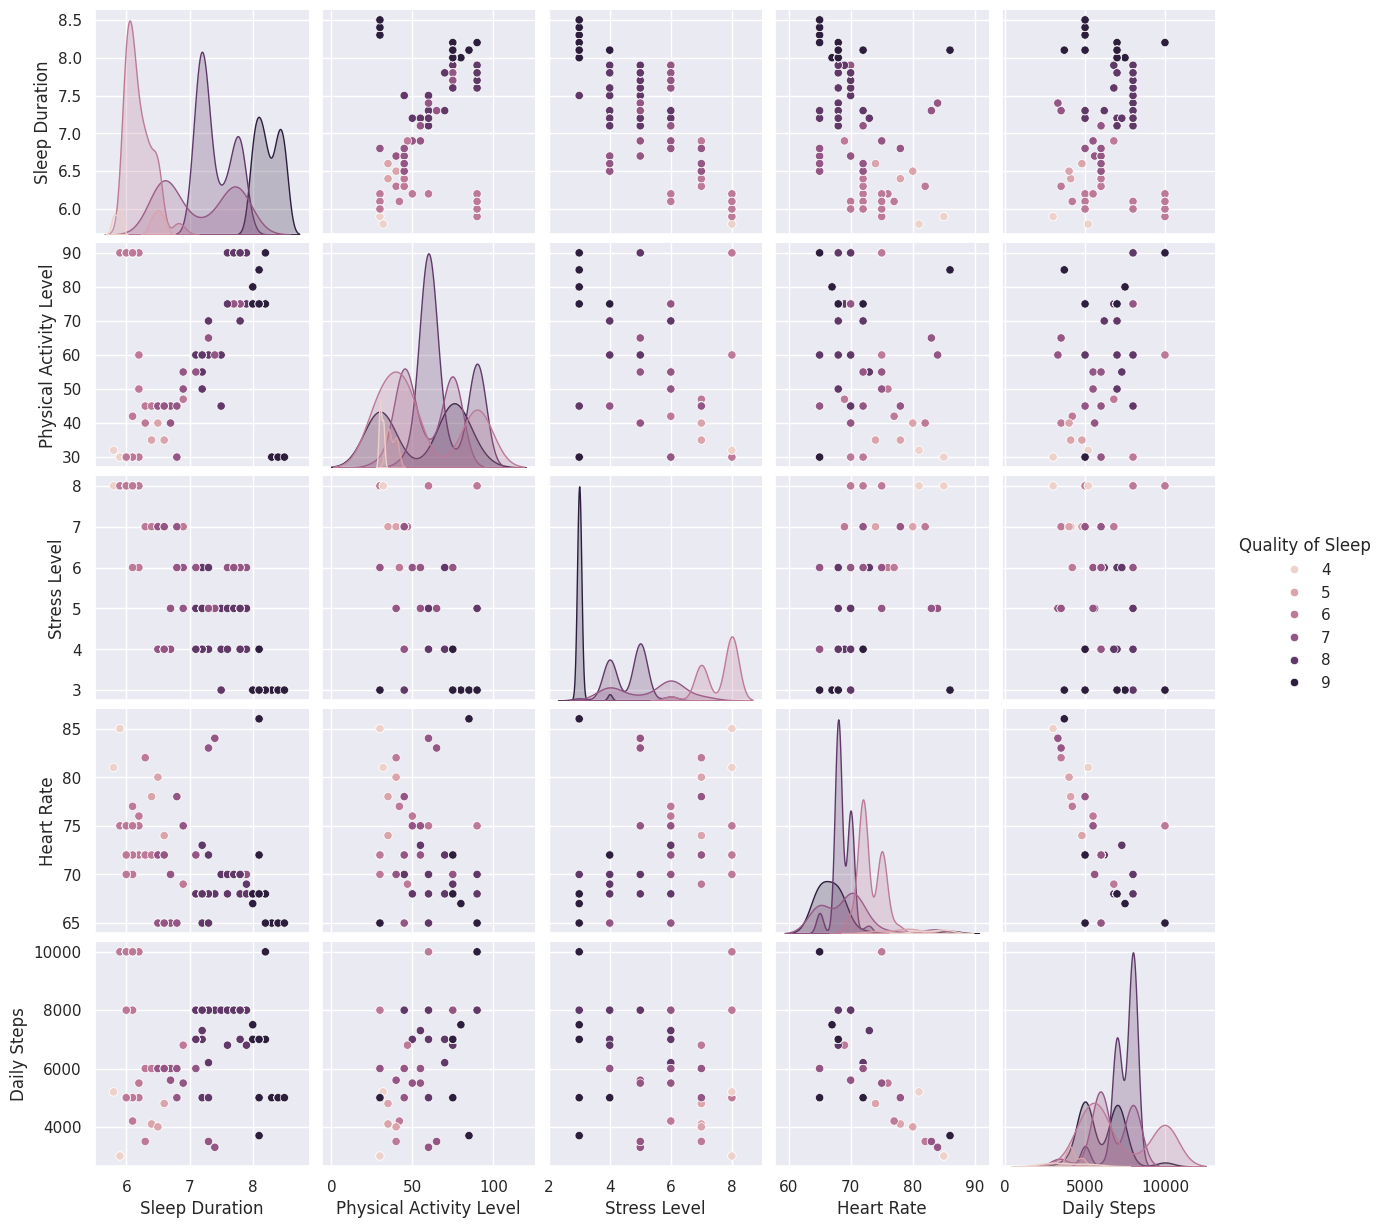

In [5]:
sns.pairplot(sleep_health, hue="Quality of Sleep", vars=["Sleep Duration", "Physical Activity Level", "Stress Level", "Heart Rate", "Daily Steps"])

### SelectKBest

In [6]:
selector = SelectKBest(f_regression, k=2)

X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

print("k=2:",selector.get_feature_names_out())

selector = SelectKBest(f_regression, k=9)

X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

print("k=8:",selector.get_feature_names_out())

k=2: ['Sleep Duration' 'Stress Level']
k=8: ['Gender' 'Age' 'Sleep Duration' 'Physical Activity Level' 'Stress Level'
 'BMI Category' 'Heart Rate' 'Sleep Disorder' 'Blood_Pressure_Systolic']


### Quitamos características

In [7]:
X = X.drop(columns=["Daily Steps", "Blood_Pressure_Diastolic"], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

### Modelos de NaiveBayes

In [13]:
def naive_bayes_classifier(model, i):
  model.fit(X_train, y_train)

  y_model = model.predict(X_test)

  # Sin validación cruzada
  acc_no_val = accuracy_score(y_test, y_model)
  # Con validación cruzada
  acc_val = cross_val_score(model, X, y, cv=4).mean()

  print("Modelo: %s\nSin validación cruzada = %.2f\nCon validación cruzada = %.2f" % (str(model)[0:-2], acc_no_val, acc_val))

models = [GaussianNB(), MultinomialNB(), ComplementNB(), BernoulliNB(), CategoricalNB()]
for model in models:
  naive_bayes_classifier(model, models.index(model))
  print("------------------------------")

Modelo: GaussianNB
Sin validación cruzada = 0.89
Con validación cruzada = 0.81
------------------------------
Modelo: MultinomialNB
Sin validación cruzada = 0.67
Con validación cruzada = 0.56
------------------------------
Modelo: ComplementNB
Sin validación cruzada = 0.72
Con validación cruzada = 0.64
------------------------------
Modelo: BernoulliNB
Sin validación cruzada = 0.49
Con validación cruzada = 0.43
------------------------------
Modelo: CategoricalNB
Sin validación cruzada = 0.97
Con validación cruzada = nan
------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:794: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 117, in __call__
    score = scorer(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/naive_bayes.py", line 106, in predict
    jll = self._joint_log_likelihood(X)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/naive_bayes.py", line 1530, in _joint_log_likelihood
    jll += self.feature_log_prob_[i][:, indices].T
IndexErr